<a href="https://colab.research.google.com/github/licettbermudezr-cmyk/Taller-3-Conceptos/blob/main/Semana_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

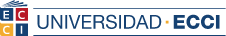
# **SISTEMAS AVANZADOS DE PRODUCCIÓN CON PYTHON**

# **Taller 3 (8h): De Regresión Lineal a Machine Learning**

**Objetivos de la sesión**

- Definir los conceptos fundamentales de Aprendizaje Automático (ML) y sus tipos principales.

- Identificar problemas de negocio en Ingeniería Industrial susceptibles de ser abordados con ML.

- Construir, entrenar y evaluar modelos de Regresión Lineal (Simple y Múltiple) utilizando el método de Mínimos Cuadrados Ordinarios (OLS).

- Interpretar los coeficientes y métricas de un modelo de regresión lineal en el contexto de un problema industrial.

- Codificar variables categóricas correctamente para su uso en modelos lineales.

- Comprender el principio fundamental del algoritmo de Gradiente Descendente para minimizar una función de costo.

- Distinguir entre un problema de regresión y uno de clasificación, y entender la aplicación básica de la Regresión Logística.




# **Semana 6 - Clase 1**


  


## **Introducción al Aprendizaje Automático**


- **Motivación / pregunta problema:**  
Una planta quiere mejorar la **predicción de demanda semanal** para planear mejor inventarios y capacidad. ¿Cómo lograr que el sistema **aprenda de los datos** históricos (tendencias, estacionalidad) en lugar de depender solo de la intuición?

- **Contexto:**  
El aprendizaje automático (ML) permite **predecir, clasificar y optimizar** procesos de producción a partir de datos operativos: demanda, tiempos de ciclo, scrap/defectos, paros, consumo de materiales, etc. En este curso lo conectaremos con **regresión** (explicar y predecir cantidades) y **clasificación** (aprobado/rechazado), usando datasets de práctica como *Housing* y ejemplos industriales reales.  
R


---


## ¿Pero qué es ML?
- *Dar a los computadores la capacidad de **aprender patrones** a partir de datos sin reglas programadas a mano.*

- **Tipos principales de Machine Learning**:


1.   *Aprendizaje Supervisado* (regresión, clasificación)
2.   *Aprendizaje No supervisado* (clustering)
3.   *Aprendizaje por Refuerzo* (decisiones secuenciales en línea de producción).


<div align="center">
  <img src="https://somospnt.com/images/blog/articulos/machine-learning/082918_1102_WhatisMachi5.png" width="60%">
</div>

- Por ejemplo, ver:

  https://www.youtube.com/watch?v=ukzFI9rgwfU,

  https://www.youtube.com/watch?v=QilHGSYbjDQ

- **Ruta en proyectos de Machine Learning**  


1. *Preprocesar* (limpiar/escala/codificar).  
2. *Entrenar y seleccionar* un modelo.  
3. *Evaluar* y *predecir* casos nuevos.

## ¿Como nace el machine learning? (ultra-breve y útil)

1. **El Perceptrón (1957):** [Frank Rosenblatt](https://https://medium.com/@robdelacruz/frank-rosenblatts-perceptron-19fcce9d627f) crea el primer "modelo de neurona" artificial. Era un algoritmo simple que podía aprender a clasificar datos básicos (como reconocer patrones visuales simples). Es el abuelo de las redes neuronales de hoy. 🧠
2. **Los "Inviernos de la IA" (70s-90s):** Tras la euforia inicial, el progreso se estancó. Las computadoras no eran lo suficientemente potentes y los modelos como el Perceptrón tenían limitaciones teóricas. La financiación se desplomó y la investigación se ralentizó considerablemente. ❄️

3.  **La Consagración: Los Premios Nobel de 2024** 🏆: Tras décadas de desarrollo, el 2024 marcó el año de la validación científica definitiva para el aprendizaje automático. Por primera vez, los Premios Nobel, los galardones más prestigiosos de la ciencia, reconocieron de manera directa y contundente las contribuciones de la inteligencia artificial, tanto en sus fundamentos teóricos como en sus aplicaciones revolucionarias.

    **[Premio Nobel de Física](https://https://www.youtube.com/watch?v=SBGG4WNweEc)**: Otorgado a John J. Hopfield y Geoffrey Hinton por "descubrimientos e invenciones fundamentales que permiten el aprendizaje automático con redes neuronales artificiales". Este premio consagró las bases teóricas que sustentan la IA moderna, reconociendo el trabajo de décadas que hizo posible el deep learning.

    **Premio Nobel de Química**: Entregado a David Baker, Demis Hassabis y John M. Jumper por sus trabajos en el diseño computacional de proteínas y, de manera destacada, por la predicción de su estructura. El logro de AlphaFold de DeepMind, liderado por Hassabis y Jumper, resolvió uno de los mayores desafíos de la biología usando IA, cambiando para siempre el diseño de fármacos y la comprensión de las enfermedades.

    Estos premios significaron que el machine learning dejó de ser visto solo como una herramienta de la computación para ser reconocido como un motor fundamental de descubrimiento científico a la par de la teoría y la experimentación.

---

## ¿Por qué te importa en Ingeniería Industrial?
- **Planear inventarios** (predicción de demanda).  
- **Calidad** (clasificar piezas como OK/Defecto).  
- **Mantenimiento** (fallo/no-fallo).  
- **Productividad** (predecir throughput según turnos, mezcla de productos, setups, etc.).  

---

## Preguntas cortas:
<mark style="background-color: #ffff00"> Piensa en tu experiencia académica/laboral en operaciones: elige 1 problema (inventarios, calidad, mantenimiento, productividad).</mark>

<mark style="background-color: #ffff00">1. **Indica Y** (lo que quieres predecir/clasificar).</mark>

<mark style="background-color: #ffff00">2. **Lista X** (3–5 variables que medirías).</mark>

<mark style="background-color: #ffff00">3. **Di si es regresión** (numérico) o clasificación





1. Cantidad de leche que se necesitará para la producción semanal.
(Variable objetivo: demanda_leche).
2.
ventas_semana → ventas históricas de arequipe.
temporada → si es temporada alta (festivos, navidad, etc.) o baja.
capacidad_produccion → volumen máximo que se puede procesar.
precio_leche → costo de la materia prima.
inventario_actual → stock disponible en bodega.

3.Regresión, porque el resultado Y (cantidad de leche) es un valor numérico continuo.


## **Preprocesamiento de Datos**

* **Motivación / pregunta problema:**
  Tu modelo solo “ve” lo que le entregas. ¿Cómo transformar datos crudos (faltantes, categorías, fechas, outliers) en **señales útiles** para que un algoritmo aprenda **patrones reales** y no **ruido**?

* **Contexto:**
  El preprocesamiento es la columna vertebral de cualquier proyecto de ML: **limpieza**, **codificación**, **escalado**, **ingeniería de variables**, **partición de datos** y **evitar fugas de información** (*data leakage*). Un buen preprocesamiento suele mejorar más el desempeño que cambiar de modelo.
  Aplicaremos esto sobre problemas típicos de **demanda**, **calidad**, **mantenimiento** y **productividad** en industria.

---

## ¿Qué es preprocesar?

* *Convertir datos “del mundo real” en una representación numérica consistente, informativa y segura para el modelo.*

* Reduce sesgos por magnitud, trata faltantes y categorías, estabiliza distribuciones y **previene errores de evaluación**.

* **Ruta típica de preprocesamiento**

  1. **Explorar y auditar** (tipos, rangos, faltantes, cardinalidades).
  2. **Partir datos** (train/valid/test o corte temporal) **antes** de cualquier cómputo que use información global.
  3. **Imputar** faltantes (por columna).
  4. **Codificar** categóricas (One-Hot/Ordinal).
  5. **Escalar/normalizar** numéricas (si el modelo lo necesita).
  6. **Ingeniería de variables** (fechas, lags, rolling, log1p, interacciones).
  7. **Empaquetar en *Pipeline*** para reproducibilidad y evitar fugas.

<div align="center">
  <img src="https://www.jacobsoft.com.mx/wp-content/uploads/2018/09/fases-de-analisis-768x445.png" width="85%">
</div>

---

## Tipos principales de transformaciones

1. **Valores faltantes (NaN)**

   * Numéricas: media/mediana; si hay sesgo y outliers → **mediana** suele ser más robusta.
   * Categóricas: “Desconocido”/“Sin\_dato” o la categoría más frecuente.
   * Series de tiempo: *forward fill/back fill*, medias móviles, interpolación (con cuidado de no usar el futuro).

2. **Variables categóricas**

   * **One-Hot**: seguro y estándar cuando no hay demasiadas categorías.
   * **Ordinal**: útil si existe **orden natural** (p. ej., `Bajo < Medio < Alto`).
   * **Alta cardinalidad**: agrupar *top-k* y poner “Otros”; evitar “target encoding” al inicio (riesgo de *leakage* si no se hace dentro de CV).

<div align="center">
  <img src="https://substackcdn.com/image/fetch/$s_!-mHE!,w_1456,c_limit,f_webp,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F6f3433d4-52d0-4795-a954-7748f01efb28_4680x3576.png" width="65%">
</div>

3. **Escalado de numéricas**

   * **StandardScaler (z-score)**: centra y escala; bien para regresión lineal, SVM, redes.
   * **MinMaxScaler**: \[0,1]; útil para redes o cuando se asume cota.
   * **RobustScaler**: resistente a outliers.
   * **Árboles/boosting** (RandomForest, XGBoost): *no* requieren escalado (pero no estorba si el *pipeline* lo incluye).

4. **Outliers**

   * Detectar por **IQR** o **z-scores**; opciones: recortar (winsorizar), transformar (**log1p** para sesgos positivos), o dejar si son reales y relevantes.

5. **Fechas y tiempo**

   * Extraer: **año, mes, día\_semana, hora, fin\_de\_semana, festivo**.
   * Series: **lags** (Y\_{t-1}, Y\_{t-2}…), **medias móviles** (rolling mean), **ventanas** (máximos/mínimos móviles).
   * Cuidar **estacionalidad** y **tendencias**.

6. **Texto (si aplica)**

   * Limpieza básica (minúsculas, signos), **bolsa de palabras**/**TF-IDF**.
   * Mantenerlo en un *pipeline* separado con `ColumnTransformer`.

7. **Desbalanceo de clases (clasificación)**

   * **Class weights** o **re-muestreo** (SMOTE/undersampling). Evaluar con **F1**, **AUC-PR** cuando la clase positiva es rara.

---

## Particiones y *data leakage* (¡crítico!)

* **Siempre** dividir antes de calcular medias/varianzas/target encodings/selección de variables.
* **i.i.d.**: `train / valid / test` (p. ej., 60/20/20).
* **Series de tiempo**: corte **temporal** (`train: hasta T`, `valid: (T, T+Δ]`, `test: (T+Δ, …]`).
* *Leakage* común:

  * Imputar o escalar usando toda la data (incluye valid/test).
  * Crear lags con información del **futuro**.
  * Usar etiquetas (Y) para filtrar/transformar X fuera de CV.


<div align="center">
  <img src="https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/stock-assets/getty/image/photography/49/63/dji_0058.jpg" width="80%">
</div>


## *Pipelines* reproducibles

* Empaquetar todo con `Pipeline`/`ColumnTransformer`: **una sola receta** para *fit/transform/predict*.
* Ventajas: evita *leakage*, facilita *GridSearch/RandomizedSearch*, y permite **exportar** (p. ej., `joblib`) para producción.

---

## Errores frecuentes (y cómo evitarlos)

* Mezclar registros de diferentes productos/plantas sin **clave** adecuada → normaliza por SKU/línea.
* Calcular estadísticas “globales” que incluyen valid/test → separa primero.
* Sobre-ingeniería de variables con poca justificación → prioriza señales simples y medibles en planta.
* No documentar decisiones → agrega un “diccionario de variables” y un checklist.

---

## Checklist rápido antes de modelar

* [ ] Tipos y rangos verificados (sin “strings” en numéricas).
* [ ] Faltantes tratados por columna.
* [ ] Categóricas codificadas; cardinalidad controlada.
* [ ] Numéricas escaladas (si el modelo lo necesita).
* [ ] Sin *leakage*: *split* hecho **antes** de computar transformaciones.
* [ ] *Pipeline* con `fit` **solo** en *train*; `transform` en *valid/test*.
* [ ] Métrica alineada al negocio (MAE/MAPE para demanda; F1/recall en defectos/fallos).

---

## ¿Por qué te importa en Ingeniería Industrial?

* **Demanda**: MAPE baja gracias a lags/rolling y estacionalidad.
* **Calidad**: variables de proceso estandarizadas → umbrales comparables entre turnos.
* **Mantenimiento**: ventanas temporales y *lead times* para anticipar fallas.
* **Productividad**: codificación de mezclas de producto, *setup times* y calendario.

---

## Preguntas cortas:

<mark style="background-color: #FFF59D">1. Elige un **caso** (demanda/calidad/mantenimiento/productividad).</mark>

<mark style="background-color: #FFF59D">2. Lista **3–5 transformaciones** que aplicarías (imputación, codificación, escalado, lags, etc.) y por qué.</mark>

<mark style="background-color: #FFF59D">4. Señala un riesgo de **leakage**(solo si existe) de tu plan y cómo lo evitarías con un pipeline.</mark>




1. Demanda (predecir cuántos kilos de arequipe se venderán la próxima semana).

2. Imputación de valores faltantes

Si en alguna semana no se registraron ventas o stock, completaría con media/mediana.

🔎 Justificación: evita que el modelo se rompa por datos incompletos.

Codificación de variables categóricas

Por ejemplo, temporada (alta/baja) → convertir a variables dummy (0/1).

🔎 Justificación: los algoritmos no entienden texto, necesitan valores numéricos.

Escalado/normalización

Variables como precio_leche y capacidad_produccion están en magnitudes diferentes.

🔎 Justificación: algoritmos como regresión logística, KNN o redes neuronales son sensibles a las escalas.

Creación de lags (variables rezagadas)

Ejemplo: ventas_semana-1, ventas_semana-2.

🔎 Justificación: la demanda futura depende de patrones históricos recientes.

Agregaciones temporales (rolling mean)

Promedio móvil de ventas de las últimas 3 semanas.

🔎 Justificación: suaviza picos y da tendencia de consumo.

3.
⚠️ Riesgo de leakage: usar en el entrenamiento datos que solo están disponibles en el futuro, por ejemplo, el inventario final de la semana o el precio proyectado de la leche.

✅ Cómo evitarlo:

Construir un pipeline donde las transformaciones (imputación, escalado, codificación) se apliquen solo dentro del set de entrenamiento, y luego se repliquen al test con los parámetros aprendidos.

Garantizar que las variables rezagadas (lags) usen solo información pasada, nunca del futuro.

In [ ]:
# =============================================================================
# 1) IMPORTACIONES
# =============================================================================
import matplotlib.pyplot as plt              # Librería estándar de gráficos
from mlxtend.plotting import scatterplotmatrix  # Matriz de dispersión rápida
from mlxtend.plotting import heatmap            # Heatmap de correlaciones
import numpy as np                              # Cálculos numéricos
import pandas as pd                             # Manejo de DataFrames

# =============================================================================
# 2) CARGA DEL DATASET (Boston Housing desde Raschka)
# =============================================================================
url = ("https://raw.githubusercontent.com/rasbt/"
       "python-machine-learning-book-3rd-edition/"
       "master/ch10/housing.data.txt")

df = pd.read_csv(url, header=None, sep=r"\s+")

df.columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
    "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

print(df.head())



      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [ ]:
# =============================================================================
# 3) SELECCIONAR COLUMNAS DE INTERÉS PARA ANALIZAR
# =============================================================================
# Escogemos 5 columnas clave para el análisis exploratorio
cols = ['LSTAT',   # % población de bajo estatus
        'INDUS',   # % acres industriales
        'NOX',     # concentración de óxidos de nitrógeno
        'RM',      # número medio de habitaciones
        'MEDV']    # valor medio de viviendas (target clásico)


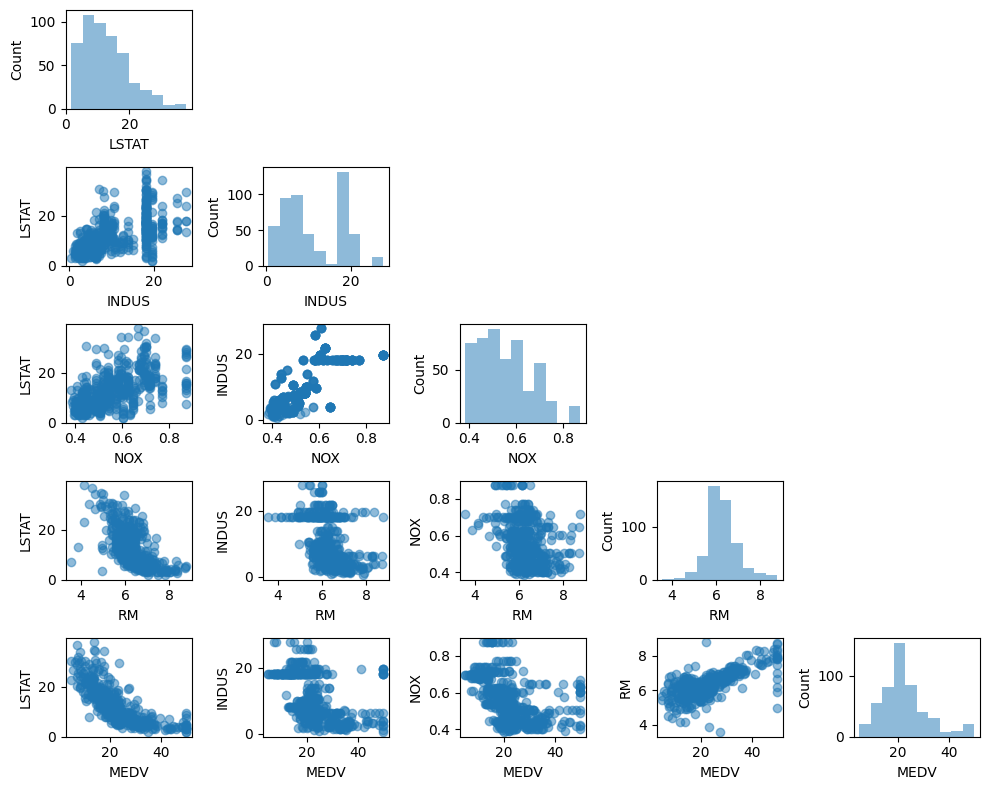

In [ ]:
# =============================================================================
# 4) MATRIZ DE DISPERSIÓN (scatterplot matrix)
# =============================================================================
# Cada par de variables se grafica en un eje XY
# Sirve para ver relaciones lineales/no lineales, nubes, outliers
scatterplotmatrix(df[cols].values,   # solo valores de esas columnas
                  figsize=(10, 8),   # tamaño de la figura
                  names=cols,        # nombres para ejes
                  alpha=0.5)         # transparencia de puntos
plt.tight_layout()
plt.show()


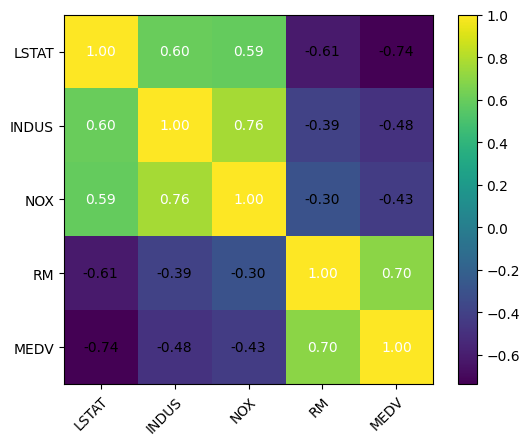

In [ ]:
# =============================================================================
# 5) HEATMAP DE CORRELACIONES
# =============================================================================
# Calculamos matriz de correlación de Pearson
cm = np.corrcoef(df[cols].values.T)  # correlación entre columnas (transpuesta)

# Dibujamos el heatmap (colores = fuerza de correlación)
hm = heatmap(cm,
             row_names=cols,      # etiquetas de filas
             column_names=cols)   # etiquetas de columnas
plt.show()


## **Regresión Lineal Simple**

* **Motivación / pregunta problema:**
  ¿Existe una **relación lineal** entre una variable explicativa $X$ (p. ej., **precio**, **temperatura de horno**, **WIP**) y una variable objetivo $Y$ (p. ej., **demanda**, **tiempo de ciclo**, **consumo energético**) que podamos usar para **predecir** y **explicar**?

* **Contexto:**
  La Regresión Lineal Simple (RLS) modela $Y$ como combinación lineal de una sola $X$: estima el **intercepto** y la **pendiente** para cuantificar cuánto cambia $Y$ cuando $X$ aumenta una unidad, manteniendo todo lo demás constante. Es un **baseline explicable** y un excelente punto de partida.

---

## ¿Qué es RLS?

* *Ajustar una recta* a los datos para **explicar** y **predecir**:

  $$
  Y = \beta_0 + \beta_1 X + \varepsilon
  $$

  donde $\beta_0$ es el intercepto, $\beta_1$ la pendiente, y $\varepsilon$ el error aleatorio.

* **Interpretación de la pendiente**:
  “Por cada +1 en $X$, $Y$ cambia en $\beta_1$ (en unidades de $Y$).”


<div align="center">
  <img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_ols_ridge_001.png" width="80%">
</div>

---

## Ruta para aplicar RLS

1. **Explorar**: diagrama de dispersión $X$–$Y$, buscar tendencia lineal y outliers.
2. **Partir datos**: `train/valid/test` (o corte temporal si hay orden en el tiempo).
3. **Ajustar** en `train`: estimar $\hat\beta_0,\hat\beta_1$ (mínimos cuadrados).
4. **Diagnóstico**: residuos vs predicción, normalidad/aprox., homocedasticidad.
5. **Evaluar** en `valid/test`: MAE, RMSE, $R^2$; revisar intervalos.
6. **Comunicar**: interpretación de $\hat\beta_1$ con **IC** y ejemplo numérico.

---

## Supuestos (y por qué importan)

1. **Linealidad**: la relación media de $Y$ con $X$ es lineal.
2. **Independencia** de errores (cuidado con series de tiempo).
3. **Homoscedasticidad**: varianza de errores constante.
4. **Normalidad** de errores (aprox.) para **inferencias** (p-valores, IC).

> Si fallan: transformar ($\log$, **Box-Cox**), agregar términos no lineales (p. ej., $X^2$) o cambiar de modelo.

---

## Métricas y contraste

* **Error**: **MAE**, **RMSE** (penaliza más errores grandes), **MAPE** (evitar si hay ceros).
* **Ajuste**: $R^2$ (proporción de varianza explicada).
* **Significancia de $\beta_1$**: prueba *t* y **IC 95%** → ¿la pendiente es distinta de 0 de forma útil?

---

## Diagnóstico visual mínimo

* **Dispersión $X$–$Y$** con la recta ajustada.
* **Residuos vs predicción**: patrón ≈ nube (sin forma) → bien; embudo → heterocedasticidad.
* **Q–Q plot** de residuos (normalidad aprox.).
* **Puntos influyentes**: apalancamiento/Cook → validar si son reales.

---

## Buenas prácticas

* **Escalado** *no es obligatorio* para OLS, pero útil si luego comparas con otros modelos.
* **Unidades** claras: documentar magnitudes para interpretar $\beta_1$.
* **Evitar extrapolación**: no predecir fuera del rango observado de $X$.
* **Intervalos**: reporta **IC** de la media y **bandas de predicción** para casos nuevos.

---

## Errores frecuentes

* Asumir linealidad sin verificar el **scatterplot**.
* Concluir “bueno” por alto $R^2$ sin revisar **residuos**.
* Usar **MAPE** con ceros o casi-ceros.
* Ignorar **puntos influyentes** que dominan la pendiente.

---

## ¿Por qué te importa en Ingeniería Industrial?

* **Demanda vs precio** (elasticidad lineal local) → decisiones de precio y promociones.
* **Tiempo de ciclo vs WIP** (aprox. lineal local) → congestión y *throughput*.
* **Energía vs temperatura de proceso** → eficiencia y costos.
* **Mermas vs velocidad de línea** → compromiso calidad–productividad.

---

## Mini-ejemplo de interpretación

> $\hat Y = 120 - 0.8\,X$ (Y = demanda semanal, X = precio \[\$]).
> **Lectura**: por cada \$1 adicional en precio, la demanda baja **0.8 unidades** (en el rango observado). Si el **IC 95%** de $\beta_1$ es $[-1.1,\,-0.5]$, el efecto es negativo y estadísticamente consistente.

---

## Preguntas cortas:

<mark style="background-color: #FFF59D">1. Elige un **caso** (p. ej., demanda vs precio). Define $Y$ y $X$ con unidades.</mark>

<mark style="background-color: #FFF59D">2. Escribe la interpretación de una pendiente hipotética $\hat\beta_1=-0.6$.</mark>

<mark style="background-color: #FFF59D">3. ¿Qué **métrica** usarías (MAE/RMSE/MAPE) y **por qué**?</mark>

<mark style="background-color: #FFF59D">4. Menciona **un supuesto** que validarías y **cómo** (gráfico o prueba).</mark>





1. Caso: Demanda de arequipe en función de su precio de venta.

Y (variable dependiente): Demanda de arequipe, medida en kilogramos vendidos por semana (kg/semana).

X (variable independiente): Precio de venta del arequipe, en pesos colombianos por kilogramo (COP/kg).

2. Por cada aumento de 1.000 COP en el precio del arequipe por kilogramo, la demanda disminuye en promedio 0.6 kilogramos por semana.
Es decir, la relación es negativa: a mayor precio, menor demanda.

3. Usaría MAPE (Mean Absolute Percentage Error) porque:

La demanda está en unidades físicas (kg/semana) y es útil interpretar el error en términos porcentuales.

Ejemplo: un MAPE del 8% significa que el modelo se equivoca en promedio un 8% de la demanda real, lo que es fácil de comunicar al área de producción.
(Alternativa: si quieres penalizar más los errores grandes, usaría RMSE).

4. Supuesto: Homocedasticidad (los errores deben tener varianza constante).

Cómo validarlo:

Hacer un gráfico de residuos vs valores predichos.

Si los residuos se dispersan de manera uniforme (sin patrón en forma de abanico), el supuesto se cumple.

Si hay forma de embudo o tendencia, hay heterocedasticidad.



Pendiente (β1): 9.374
Intercepto (β0): -36.510

Métricas en test:
 MAE : 4.978
 RMSE: 7.314
 R2  : 0.353


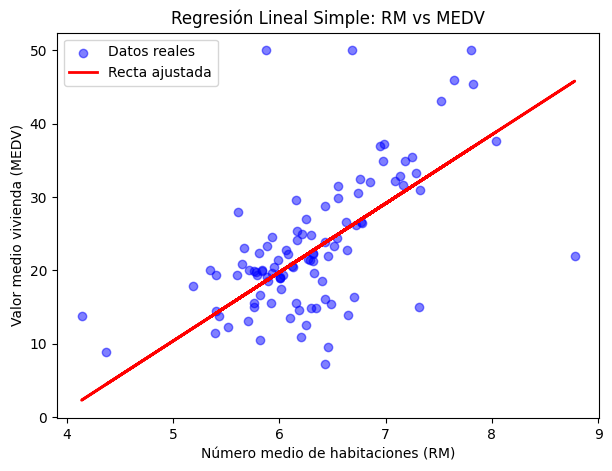

In [ ]:
# =============================================================================
# 1) IMPORTACIONES
# =============================================================================
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# =============================================================================
# 2) CARGA DEL DATASET (Boston Housing desde Raschka)
# =============================================================================
url = ("https://raw.githubusercontent.com/rasbt/"
       "python-machine-learning-book-3rd-edition/"
       "master/ch10/housing.data.txt")

df = pd.read_csv(url, header=None, sep=r"\s+")
df.columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS",
              "RAD","TAX","PTRATIO","B","LSTAT","MEDV"]

# =============================================================================
# 3) SELECCIONAMOS SOLO UNA VARIABLE (X=RM, Y=MEDV)
# =============================================================================
X = df[["RM"]]     # 2D array requerido por scikit-learn
y = df["MEDV"]     # objetivo (vector)

# Partimos en train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

# =============================================================================
# 4) AJUSTAR EL MODELO (OLS vía scikit-learn)
# =============================================================================
slr = LinearRegression()       # Creamos modelo vacío
slr.fit(X_train, y_train)      # Estimamos β0 y β1 con train
y_pred = slr.predict(X_test)   # Predicciones en test

# Parámetros aprendidos
print(f"Pendiente (β1): {slr.coef_[0]:.3f}")
print(f"Intercepto (β0): {slr.intercept_:.3f}")

# =============================================================================
# 5) MÉTRICAS DE EVALUACIÓN
# =============================================================================
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nMétricas en test:")
print(f" MAE : {mae:.3f}")
print(f" RMSE: {rmse:.3f}")
print(f" R2  : {r2:.3f}")

# =============================================================================
# 6) DIAGRAMA DE DISPERSIÓN + RECTA AJUSTADA
# =============================================================================
plt.figure(figsize=(7,5))
plt.scatter(X_test, y_test, color="blue", alpha=0.5, label="Datos reales")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Recta ajustada")
plt.xlabel("Número medio de habitaciones (RM)")
plt.ylabel("Valor medio vivienda (MEDV)")
plt.title("Regresión Lineal Simple: RM vs MEDV")
plt.legend()
plt.show()

## **Estimación por Mínimos Cuadrados Ordinarios (OLS)**

* **Motivación / pregunta problema:**
  Dado un conjunto de variables explicativas $X$ y una respuesta $Y$, ¿cómo estimar **parámetros** $\boldsymbol{\beta}$ que describan la relación lineal entre $X$ y $Y$ de forma **insesgada** y con **mínima varianza** bajo supuestos estándar?

* **Contexto:**
  **OLS** es el método clásico para ajustar **regresiones lineales** (simple y múltiple). Minimiza la **suma de cuadrados de los residuos** y, bajo supuestos Gauss–Markov, produce el estimador **BLUE** (*Best Linear Unbiased Estimator*). Es el punto de partida para inferencia (IC, pruebas $t$/$F$) y para comparar con modelos más complejos.

---

## ¿Qué es OLS?

* *Ajustar coeficientes* para minimizar el error cuadrático:

  $$
  \min_{\boldsymbol{\beta}}\ \|\,\mathbf{y}-\mathbf{X}\boldsymbol{\beta}\,\|^2
  $$

  Solución (si $\mathbf{X}^\top\mathbf{X}$ es invertible):

  $$
  \hat{\boldsymbol{\beta}}=(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y}
  $$
* **Ajustados y residuos**: $\ \hat{\mathbf{y}}=\mathbf{X}\hat{\boldsymbol{\beta}},\quad \mathbf{e}=\mathbf{y}-\hat{\mathbf{y}}$.
* **Matriz “sombrero”**: $\ \mathbf{H}=\mathbf{X}(\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top$, con $\hat{\mathbf{y}}=\mathbf{H}\mathbf{y}$.


<div align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/800px-Linear_least_squares_example2.svg.png" width="60%">
</div>

---

## Ruta para aplicar OLS

1. **Diseño del modelo**: incluir intercepto, seleccionar variables (dominio/EDA).
2. **Partir datos**: `train/valid/test` (o corte temporal).
3. **Ajustar** en `train` (resolver por **QR/SVD**, evita invertir explícitamente).
4. **Diagnóstico**: residuos, influencia, multicolinealidad.
5. **Inferencia**: IC y pruebas sobre $\beta_j$ (y $F$ global).
6. **Evaluación**: MAE/RMSE/$R^2$/$R^2_{\text{adj}}$ en `valid/test`.
7. **Comunicar**: efectos, unidades, límites (no extrapolar).

---

## Supuestos (Gauss–Markov) y consecuencias

1. **Linealidad en parámetros**: $\mathbb{E}[Y|X]=\mathbf{X}\boldsymbol{\beta}$.
2. **Rango completo**: columnas de $\mathbf{X}$ linealmente independientes.
3. **Errores con media cero** y **homocedasticidad** ($\mathrm{Var}(\varepsilon)=\sigma^2\mathbf{I}$).
4. **Independencia/no autocorrelación** de errores.
5. **Normalidad de errores** (opcional para IC exactos y $p$-valores).

> Con 1–4 se obtiene **BLUE**. Si falla homocedasticidad, usar **errores estándar robustos (HC)**; si hay autocorrelación, modelos con estructura de correlación (p. ej., GLS).



- Por ejemplo, ver:

  https://www.youtube.com/watch?v=YJRHmv6OpWQ


---

## Inferencia y varianzas

* **SSE/RSS**: $\mathrm{RSS}=\mathbf{e}^\top\mathbf{e}$.
* **Estimador de varianza**: $\hat{\sigma}^2=\mathrm{RSS}/(n-p)$ (con $p$ = # de parámetros, intercepto incluido).
* **Varianza de $\hat{\boldsymbol{\beta}}$**:

  $$
  \mathrm{Var}(\hat{\boldsymbol{\beta}})=\hat{\sigma}^2(\mathbf{X}^\top\mathbf{X})^{-1}
  $$

  → **EE** de $\hat{\beta}_j$ = raíz del diagonal correspondiente.
* **Pruebas $t$** para $\beta_j$ y **prueba $F$** para el modelo completo o comparaciones anidadas.
* **$R^2$ y $R^2_{\text{ajustado}}$**: proporción de varianza explicada (penaliza por complejidad).

---

## Diagnóstico esencial

* **Residuos vs. ajustados**: patrón ≈ nube → bien; “embudo” → heterocedasticidad.
* **Q–Q de residuos**: chequeo de normalidad aproximada.
* **Apalancamiento e influencia**: distancia de **Cook** (verificar puntos dominantes).
* **Multicolinealidad**: **VIF** alto → estimaciones inestables (intervalos anchos, signos erráticos).


<div align="center">
  <img src="https://media2.dev.to/dynamic/image/width=1000,height=420,fit=cover,gravity=auto,format=auto/https%3A%2F%2Fdev-to-uploads.s3.amazonaws.com%2Fuploads%2Farticles%2Fuwh7av0so90om8080o5q.jpeg" width="70%">
</div>

---

## Buenas prácticas

* **No invertir matrices** directamente: usa **QR/SVD** o librerías confiables.
* **Estandarizar/centrar** para mejorar estabilidad numérica e interpretación del intercepto.
* **Documentar unidades** para interpretar $\beta$.
* **Validación** fuera de muestra; evitar **extrapolación**.
* Si $\mathbf{X}^\top\mathbf{X}$ es mal condicionada: considerar **ridge/lasso** (regularización) o **selección de variables** guiada por dominio.

---

## Errores frecuentes

* Confiar solo en $R^2$ sin revisar residuos/diagnósticos.
* Ignorar **colinealidad** (coeficientes inestables).
* Usar **toda** la data para crear transformaciones antes del *split* (fuga de información).
* Reportar $\hat{\beta}$ sin **EE/IC** ni verificación de supuestos.

---

## ¿Por qué te importa en Ingeniería Industrial?

* **Costos** explicados por **horas-hombre**, **energía** y **volumen** → sensibilidad marginal de cada factor.
* **Tiempo de ciclo** según **WIP**, **turno** y **setups** → identificar palancas operativas.
* **Merma/defectos** vs **velocidad de línea** y **temperatura** → compromisos calidad–productividad.
* **Demanda** vs **precio** y **promos** → elasticidades locales para decisiones comerciales.

---

## Preguntas cortas:

<mark style="background-color: #FFF59D">1. Elige un caso (p. ej., **costo total** vs insumos). Escribe el **vector de variables** $X$ y la **respuesta** $Y$.</mark>

<mark style="background-color: #FFF59D">2. Explica cómo interpretarías el **coeficiente** de una variable clave (unidades y sentido).</mark>


<mark style="background-color: #FFF59D">5. Si hay **colinealidad**, menciona **dos** acciones para mitigarla (p. ej., combinar variables, ridge).</mark>


1.
X (variables independientes):

X1: Cantidad de leche usada (litros/semana).

X2: Cantidad de azúcar usada (kg/semana).

X3: Horas de mano de obra (horas/semana).

X4: Energía eléctrica consumida (kWh/semana).

Y (variable dependiente):

Costo_total en pesos colombianos (COP/semana).

2.
i el coeficiente estimado para X1 (litros de leche) es β₁ = 2.500, se interpreta como:

👉 Por cada litro adicional de leche usado en la producción, el costo total aumenta en promedio 2.500 COP, manteniendo constantes los demás insumos.

Unidad: pesos/litro.

Sentido: positivo, porque más insumo → más costo.

3. La colinealidad ocurre cuando dos o más variables explicativas están muy correlacionadas (ejemplo: leche y azúcar si siempre crecen juntas).

⚠️ Riesgos: hace inestables los coeficientes y difícil la interpretación.

✅ Acciones para mitigarla:

Combinar variables → por ejemplo, crear un índice de “materia prima” que integre leche y azúcar en lugar de incluirlas por separado.

Regularización (Ridge Regression) → penaliza los coeficientes grandes y reduce el impacto de la colinealidad.

(Otras opciones: eliminar variables redundantes, usar PCA para reducción de dimensionalidad).

In [ ]:
# ==========================================================
# 1) IMPORTACIONES Y DATA
# ==========================================================
import numpy as np
import pandas as pd
from numpy.linalg import inv, pinv  # inversa y seudoinversa (numéricamente más estable)
from sklearn.model_selection import train_test_split

# -- Cargar Boston Housing desde el repo de Raschka --
url = ("https://raw.githubusercontent.com/rasbt/"
       "python-machine-learning-book-3rd-edition/"
       "master/ch10/housing.data.txt")

# El archivo está separado por espacios y sin cabecera
df = pd.read_csv(url, header=None, sep=r"\s+")
df.columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS",
              "RAD","TAX","PTRATIO","B","LSTAT","MEDV"]

print(df.shape)   # (506, 14)
df.head()


# ==========================================================
# 2) SELECCIÓN DE VARIABLES Y SPLIT
# ==========================================================
# Elegimos un subconjunto razonable (ejemplo múltiple) para la clase:
features = ["RM", "LSTAT", "PTRATIO", "NOX"]  # puedes cambiar o usar todas

X_raw = df[features].copy()  # X cruda (sin intercepto)
y_raw = df["MEDV"].values    # y como vector numpy

# Split 70/15/15 (train/valid/test). Importante: split ANTES de calcular nada.
X_tr, X_tmp, y_tr, y_tmp = train_test_split(X_raw, y_raw, test_size=0.30, random_state=42, shuffle=True)
X_va, X_te, y_va, y_te     = train_test_split(X_tmp, y_tmp, test_size=0.50, random_state=42, shuffle=True)

X_tr.shape, X_va.shape, X_te.shape


# ==========================================================
# 3) MATRIZ DE DISEÑO CON INTERCEPTO
# ==========================================================
def add_intercept(Xdf: pd.DataFrame) -> np.ndarray:
    """
    Recibe un DataFrame de features y devuelve la matriz de diseño:
    [1, x1, x2, ..., xp] para cada fila (intercepto en la 1ª columna).
    """
    n = len(Xdf)
    ones = np.ones((n, 1))          # columna de 1's para el intercepto
    return np.hstack([ones, Xdf.values])  # concatena por columnas

X_tr_m = add_intercept(X_tr)  # matriz de diseño de train
X_va_m = add_intercept(X_va)  # valid
X_te_m = add_intercept(X_te)  # test

# Para referencia:
#   - n: número de observaciones
#   - p: número de parámetros = (nº de columnas de X) = 1 + nº de features
n_tr, p = X_tr_m.shape
n_tr, p


# ==========================================================
# 4) OLS CON MATRICES: beta_hat = (X'X)^(-1) X'y
# ==========================================================
# (A) Forma "libro de texto" (inversa explícita) -- didáctico, pero menos estable:
XtX = X_tr_m.T @ X_tr_m               # X'X
Xty = X_tr_m.T @ y_tr                 # X'y
beta_hat_inv = inv(XtX) @ Xty         # (X'X)^(-1) X'y

# (B) Forma numéricamente más estable: seudoinversa de Moore-Penrose
beta_hat_pinv = pinv(X_tr_m) @ y_tr   # equivale a resolver por SVD/QR

# Usaremos la versión estable para predecir, pero imprimimos ambas para comparar
print("Coeficientes (inv): ", beta_hat_inv)
print("Coeficientes (pinv):", beta_hat_pinv)

# Elegimos beta_hat final (pinv recomendado en práctica)
beta_hat = beta_hat_pinv


# ==========================================================
# 5) MÉTRICAS EN TRAIN / VALID / TEST
# ==========================================================
def predict_matrix(Xm: np.ndarray, beta: np.ndarray) -> np.ndarray:
    """ Predicciones con matrices: y_hat = X beta """
    return Xm @ beta

def metrics(y_true, y_pred):
    """ Devuelve RSS, MSE, RMSE y R^2 """
    resid = y_true - y_pred
    RSS = float(resid.T @ resid)                     # e'e
    n = len(y_true)
    MSE = RSS / n
    RMSE = np.sqrt(MSE)
    # R^2 = 1 - RSS/TSS, con TSS = sum((y - y_bar)^2)
    TSS = float(((y_true - y_true.mean())**2).sum())
    R2  = 1.0 - (RSS / TSS)
    return {"RSS": RSS, "MSE": MSE, "RMSE": RMSE, "R2": R2}

# --- TRAIN ---
yhat_tr = predict_matrix(X_tr_m, beta_hat)
m_tr = metrics(y_tr, yhat_tr)

# --- VALID ---
yhat_va = predict_matrix(X_va_m, beta_hat)
m_va = metrics(y_va, yhat_va)

# --- TEST ---
yhat_te = predict_matrix(X_te_m, beta_hat)
m_te = metrics(y_te, yhat_te)

print("TRAIN:", m_tr)
print("VALID:", m_va)
print("TEST :", m_te)



# ==========================================================
# 6) H, SIGMA^2, VAR(BETA) Y ERRORES ESTÁNDAR
# ==========================================================
# Matriz "sombrero": H = X (X'X)^(-1) X'
# Nota: usar inv() aquí es didáctico; en práctica, preferir QR/SVD.
XtX_inv = inv(X_tr_m.T @ X_tr_m)
H = X_tr_m @ XtX_inv @ X_tr_m.T

# Residuos en train y RSS (ya lo tenemos vía métricas)
e_tr = y_tr - yhat_tr
RSS_tr = float(e_tr.T @ e_tr)

# Grados de libertad: n - p   (p = nº de parámetros, incluye intercepto)
df_resid = n_tr - p

# Estimador de varianza del error: sigma^2_hat = RSS/(n - p)
sigma2_hat = RSS_tr / df_resid

# Var(beta_hat) = sigma^2_hat * (X'X)^(-1)
Var_beta = sigma2_hat * XtX_inv

# Errores estándar: EE = sqrt(diag(Var_beta))
se_beta = np.sqrt(np.diag(Var_beta))

# Mostramos una tabla bonita de coeficientes, EE y z aprox. (o t con df=n-p)
coef_names = ["Intercepto"] + features
res_tab = pd.DataFrame({
    "coef": beta_hat,
    "EE": se_beta,
    "z_aprox": beta_hat / se_beta  # en muestras grandes ~ N(0,1); exacto sería t(df_resid)
}, index=coef_names)

print(f"n={n_tr}, p={p}, df_resid={df_resid}")
print(f"sigma^2_hat={sigma2_hat:.4f}, sigma_hat={np.sqrt(sigma2_hat):.4f}")
res_tab

# ==========================================================
# 7) OPCIONAL: RLS CON UNA SOLA X (RM)
# ==========================================================
X1_tr = add_intercept(X_tr[["RM"]])   # solo 'RM'
X1_va = add_intercept(X_va[["RM"]])
X1_te = add_intercept(X_te[["RM"]])

beta1 = pinv(X1_tr) @ y_tr            # coeficientes [beta0, beta1]
y1_tr = X1_tr @ beta1
y1_va = X1_va @ beta1
y1_te = X1_te @ beta1

print("RLS (sólo RM) - TRAIN:", metrics(y_tr, y1_tr))
print("RLS (sólo RM) - VALID:", metrics(y_va, y1_va))
print("RLS (sólo RM) - TEST :", metrics(y_te, y1_te))
print("Pendiente (β1) con RM:", beta1[1], " | Intercepto (β0):", beta1[0])



(506, 14)
Coeficientes (inv):  [18.07034862  4.45992851 -0.60952024 -0.86266442  0.12939291]
Coeficientes (pinv): [18.07034862  4.45992851 -0.60952024 -0.86266442  0.12939291]
TRAIN: {'RSS': 9801.231771049625, 'MSE': 27.687095398445265, 'RMSE': np.float64(5.261852848421862), 'R2': 0.6850035424248732}
VALID: {'RSS': 1387.7157181418095, 'MSE': 18.259417343971176, 'RMSE': np.float64(4.273103947246214), 'R2': 0.7367821156793237}
TEST : {'RSS': 2568.9718571741673, 'MSE': 33.80226127860747, 'RMSE': np.float64(5.813971214119268), 'R2': 0.5747039224601486}
n=354, p=5, df_resid=349
sigma^2_hat=28.0838, sigma_hat=5.2994
RLS (sólo RM) - TRAIN: {'RSS': 15934.515091316396, 'MSE': 45.01275449524406, 'RMSE': np.float64(6.709154529092623), 'R2': 0.48788928532759923}
RLS (sólo RM) - VALID: {'RSS': 1501.442710891967, 'MSE': 19.755825143315356, 'RMSE': np.float64(4.444752540166365), 'R2': 0.7152107102174521}
RLS (sólo RM) - TEST : {'RSS': 4631.977643184736, 'MSE': 60.94707425243073, 'RMSE': np.float64(7.

# **Semana 6 - Clase 2**

## **Regresión Lineal Múltiple**

* **Motivación / pregunta problema:**
  ¿Podemos explicar y predecir $Y$ usando **varias** variables $X_1,\dots,X_p$ (p. ej., demanda con precio, promo, semana, clima), cuantificando el efecto **marginal** de cada factor?

* **Contexto:**
  La Regresión Lineal Múltiple (RLM) extiende la recta a un **hiperplano**. Permite **controlar por confusores**, estimar **sensibilidades** y construir un **baseline explicable** para comparación con modelos no lineales.

---

## ¿Qué es RLM?

* Modelo:

  $$
  Y=\beta_0+\beta_1X_1+\cdots+\beta_pX_p+\varepsilon
  $$

  Estimación típica por **OLS** (mínimos cuadrados).
* **Interpretación**: $\beta_j$ ≈ cambio esperado en $Y$ por +1 en $X_j$, **manteniendo fijas** las demás $X$.

<div align="center">
  <img src="https://uk.mathworks.com/discovery/linear-regression/_jcr_content/mainParsys/image_1583733776.adapt.full.medium.jpg/1756122105340.jpg" width="70%">
</div>

---

## Ruta para aplicar RLM

1. **Diseño del modelo** (dominio + EDA): seleccionar variables útiles; añadir **interacciones** (p. ej., precio×promo) y/o términos **no lineales** (p. ej., $X^2$).
2. **Partición** (i.i.d. o temporal).
3. **Preprocesamiento**: dummies para categóricas, escalado si comparas con otros modelos.
4. **Ajuste** (OLS con QR/SVD) en *train*.
5. **Diagnóstico**: residuos, colinealidad (**VIF**), influencia (Cook).
6. **Inferencia**: IC y pruebas $t/F$; comparar anidados.
7. **Evaluación**: RMSE/MAE, $R^2$, $R^2_{\text{aj}}$ en *valid/test*.
8. **Comunicación**: efectos, unidades, límites (no extrapolar).

---

## Supuestos clave

* Linealidad en parámetros; errores con media cero; **homocedasticidad**; **independencia**; normalidad (para $p$-valores).
* **Colinealidad** alta ⇒ coeficientes inestables → revisar **VIF**, combinar variables o usar **regularización** (ridge/lasso).

---

## Diagnóstico esencial

* **Residuos vs ajustados** (nube ≈ OK).
* **Q–Q** residuos (normalidad aprox.).
* **Cook** y apalancamiento (puntos dominantes).
* **VIF** > 10 (regla práctica) → alerta de colinealidad.

---

## Buenas prácticas

* Documentar **unidades** (interpretar $\beta$).
* Considerar **interacciones** y **no linealidades** simples antes de cambiar de familia de modelos.
* Validación **fuera de muestra**; evitar **extrapolación**.
* Si hay muchas $X$: selección con **CV**, **AIC/BIC**, o **regularización**.

---

## Errores frecuentes

* Confiar solo en $R^2$.
* Ignorar colinealidad.
* Dummies mal definidas (**trampa de la variable ficticia** con todas las categorías).
* *Leakage* al calcular transformaciones antes del *split*.

---

## ¿Por qué te importa en Ingeniería Industrial?

* **Demanda** por precio, promo, estacionalidad y clima.
* **Costos** por volumen, horas-hombre, energía.
* **Calidad** por velocidad de línea, temperatura, lote.
* **Productividad** por WIP, setups, turno.

---

## Preguntas cortas:

<mark style="background-color: #FFF59D">1. Plantea un caso con $Y$ y **4–6** $X$. ¿Qué **interacción** añadirías y por qué?</mark>

<mark style="background-color: #FFF59D">2. Si un **VIF** sale alto, da **dos** acciones para mitigarlo.</mark>




Escenario: queremos explicar la productividad semanal (kg de arequipe producido = Y) en función de varios factores.

Y: Producción total de arequipe (kg/semana).

X (variables independientes):

X1: Cantidad de leche (litros).

X2: Cantidad de azúcar (kg).

X3: Horas de trabajo de los operarios.

X4: Temperatura promedio de cocción (°C).

X5: Energía eléctrica consumida (kWh).

👉 Interacción a añadir: X1 * X2 (leche × azúcar).

Razón: la producción depende no solo de cada insumo individual, sino de su proporción conjunta. Mucha leche sin suficiente azúcar (o al revés) no genera el mismo rendimiento.

Interpretación: el efecto de la leche sobre la producción cambia según la cantidad de azúcar usada (y viceversa).

2. Si un VIF sale alto (indica multicolinealidad)

Acciones para mitigarlo:

Eliminar o combinar variables altamente correlacionadas → Ejemplo: si X1 (leche) y X2 (azúcar) siempre están muy relacionadas, se podría usar una sola variable como “materias primas totales”.

Aplicar regularización (Ridge o Lasso Regression) → Estos métodos ajustan los coeficientes penalizando los más grandes, estabilizando la regresión y reduciendo el impacto de la colinealidad.

(Otras opciones: usar PCA o centrar/escalar variables, pero con Ridge/Lasso y combinación de variables ya cubres lo esencial).

      RM  LSTAT  MEDV
0  6.575   4.98  24.0
1  6.421   9.14  21.6
2  7.185   4.03  34.7
3  6.998   2.94  33.4
4  7.147   5.33  36.2
Intercepto (β0): -3.8411770790048827
Pendientes (β1, β2): [ 5.46509877 -0.63249856]
RMSE en test: 5.589569804715174
R² en test  : 0.5739577415025858


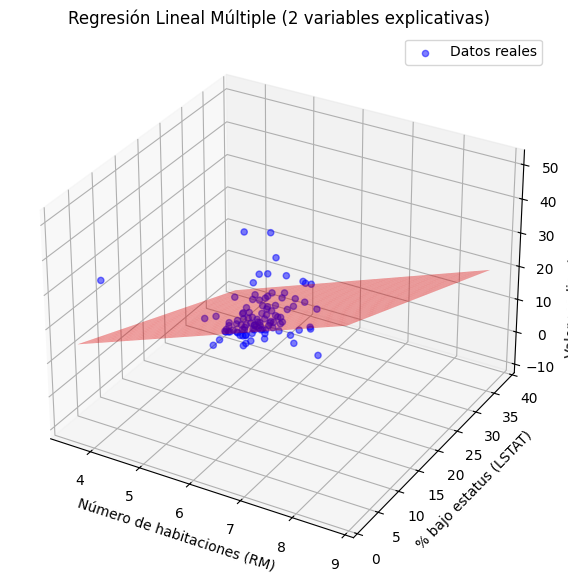

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D  # para gráficas 3D

# --- Dataset Boston Housing (Raschka) ---
url = ("https://raw.githubusercontent.com/rasbt/"
       "python-machine-learning-book-3rd-edition/"
       "master/ch10/housing.data.txt")

df = pd.read_csv(url, header=None, sep=r"\s+")
df.columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS",
              "RAD","TAX","PTRATIO","B","LSTAT","MEDV"]

print(df[["RM","LSTAT","MEDV"]].head())

# Variables explicativas: número de habitaciones (RM) y % bajo estatus (LSTAT)
X = df[["RM","LSTAT"]]
y = df["MEDV"]

# Split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Crear y ajustar modelo
mlr = LinearRegression()
mlr.fit(X_train, y_train)

# Predicciones
y_pred = mlr.predict(X_test)

# Coeficientes
print("Intercepto (β0):", mlr.intercept_)
print("Pendientes (β1, β2):", mlr.coef_)

# Métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE en test:", rmse)
print("R² en test  :", r2)

# Creamos malla de valores para RM y LSTAT
rm_range = np.linspace(X["RM"].min(), X["RM"].max(), 50)
ls_range = np.linspace(X["LSTAT"].min(), X["LSTAT"].max(), 50)
RM_grid, LS_grid = np.meshgrid(rm_range, ls_range)

# Predicción del plano ajustado
Z_pred = mlr.intercept_ + mlr.coef_[0]*RM_grid + mlr.coef_[1]*LS_grid

# Gráfico 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Puntos reales (test set)
ax.scatter(X_test["RM"], X_test["LSTAT"], y_test,
           color="blue", alpha=0.5, label="Datos reales")

# Plano de regresión
ax.plot_surface(RM_grid, LS_grid, Z_pred, color="red", alpha=0.4)

ax.set_xlabel("Número de habitaciones (RM)")
ax.set_ylabel("% bajo estatus (LSTAT)")
ax.set_zlabel("Valor medio vivienda (MEDV)")
ax.set_title("Regresión Lineal Múltiple (2 variables explicativas)")

plt.legend()
plt.show()




## **Variables Categóricas y Dummies**

* **Motivación / pregunta problema:**
  ¿Cómo incorporar **turno**, **familia de producto**, **máquina**, **región** (no numéricos) al modelo sin perder interpretabilidad ni introducir sesgos?

* **Contexto:**
  Los modelos lineales requieren representaciones **numéricas**. Las **dummies** (One-Hot) permiten comparar categorías frente a una **categoría base**.

---

## ¿Qué son las dummies?

* Para una variable con $k$ categorías se crean $k-1$ columnas binarias (0/1) y se omite una **base** para evitar colinealidad perfecta.
* Coeficiente $\beta_{\text{cat}=j}$: diferencia esperada en $Y$ respecto a la **base**.


<div align="center">
  <img src="https://fhernanb.github.io/libro_regresion/images/embudo.png" width="50%">
</div>

---

## Ruta para codificar

1. **Elegir base** con sentido (p. ej., “sin promo”, “turno día”).
2. **One-Hot** en *train* (guardar columnas) y **aplicar igual** en *valid/test*.
3. **Cardinalidad alta**: agrupar *top-k* + “Otros”; considerar **target encoding** solo dentro de CV (controlando *leakage*).
4. **Unseen levels**: configurar codificador para ignorar/agrupar (evitar fallos en producción).
5. **Interacciones**: numérica×categoría (pendientes diferentes por grupo).

<div align="center">
  <img src="https://fhernanb.github.io/libro_regresion/images/var_cuali_01.png" width="70%">
</div>


---

## Alternativas y cuidado

* **Ordinal** si existe orden natural (p. ej., “Bajo\<Medio\<Alto”).
* **Effect coding** (contrastes suma cero) para comparar con la media global.
* Árboles/boosting toleran One-Hot; algunos frameworks aceptan categóricas nativas.

---

## Buenas prácticas

* Documentar **significado** de la base.
* Controlar **cardinalidad** (no crear miles de columnas).
* Tratar categorías raras (frecuencia baja) para robustez.
* Mantener todo en **Pipeline/ColumnTransformer**.

---

## Ejemplo: Velocidad de Máquina y Proveedor de Material

* **Objetivo**: Minimizar la tasa de defectos de una pieza metálica.

* **Variable Numérica**: Velocidad de la máquina (en RPM).

* **Variable Categórica**: Proveedor de la materia prima (Proveedor A vs. Proveedor B).

* Se encuentra una interacción significativa.

* **Interpretación Concreta**
  El análisis muestra que el efecto de la velocidad de la máquina sobre los defectos depende críticamente del proveedor.

* Con material del Proveedor A: Aumentar 100 RPM la velocidad no aumenta significativamente los defectos. El material es robusto.

* Con material del Proveedor B: Aumentar 100 RPM la velocidad dispara la tasa de defectos en un 5%. El material es sensible a la velocidad.

* Conclusión para el ingeniero:

  "No podemos simplemente aumentar la velocidad de la máquina para producir más. Si usamos el material del Proveedor B, estamos obligados a mantener una velocidad baja. Para operar a altas velocidades de forma rentable, es obligatorio usar el material del Proveedor A".

---

## ¿Por qué te importa en Ingeniería Industrial?

* **Turno** (día/noche) y **línea** afectan tiempos y calidad.
* **Familia de producto** segmenta demandas y mermas.
* **Región/cliente** explica patrones de consumo y devolución.

---

## Preguntas cortas:

<mark style="background-color: #FFF59D">1. Define una variable categórica de tu caso (o inventa una) y elige la **base**. Justifica.</mark>

<mark style="background-color: #FFF59D">2. Crea una **interacción** numérica×categoría y explica su interpretación.</mark>





Variable categórica y base

Caso: Producción de arequipe.

Variable categórica: Turno de producción (Turno = {Mañana, Tarde, Noche}).

Base elegida: Mañana.

Justificación: normalmente el turno de la mañana se usa como referencia porque suele tener mayor estabilidad (menos fatiga de operarios, mejor disponibilidad de insumos) y sirve como comparación contra los demás turnos.

2. Interacción numérica × categoría

Variable numérica: Horas de trabajo de los operarios (Horas).

Categoría: Turno.

Interacción: Horas × Turno(Tarde) y Horas × Turno(Noche).

Interpretación:

El efecto de las horas de trabajo sobre la productividad depende del turno.

Ejemplo: si el coeficiente de Horas × Turno(Noche) es negativo, significa que trabajar más horas en la noche aumenta menos (o incluso reduce) la productividad comparado con el turno de la mañana.

Así podemos medir si los turnos afectan la eficiencia del tiempo invertido.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer

# --- Cargar Boston Housing (Raschka) ---
url = ("https://raw.githubusercontent.com/rasbt/"
       "python-machine-learning-book-3rd-edition/"
       "master/ch10/housing.data.txt")
df = pd.read_csv(url, header=None, sep=r"\s+")
df.columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS",
              "RAD","TAX","PTRATIO","B","LSTAT","MEDV"]

# Objetivo (para mantener estructura, aunque hoy no modelamos)
y = df["MEDV"].copy()

# --- Elegimos algunas numéricas + 2 categóricas ---
# CHAS: 0/1 (categórica binaria)
# REGION: categórica creada al discretizar DIS (distancia a empleos) en 3 niveles
X = df[["RM","LSTAT","PTRATIO","DIS","CHAS"]].copy()

# Crear REGION por cuantiles (baja, media, alta distancia)
X["REGION"] = pd.qcut(X["DIS"], q=3, labels=["Cerca","Medio","Lejos"])
X = X.drop(columns=["DIS"])  # ya no usaremos la DIS numérica; quedamos con REGION categórica

num_cols = ["RM","LSTAT","PTRATIO"]     # numéricas
cat_cols = ["CHAS","REGION"]            # categóricas

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=123, shuffle=True
)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=123, shuffle=True
)


# Pipeline numérico: imputación (mediana) + escalado (opcional para lineales)
num_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Pipeline categórico: imputación de moda + One-Hot con base y niveles no vistos
cat_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False))
])

# ColumnTransformer que aplica cada pipeline a su tipo de columna
preprocess = ColumnTransformer(transformers=[
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])


# Ajustar SOLO con train (evita leakage)
preprocess.fit(X_train)

# Transformar splits
Xtr_p = preprocess.transform(X_train)
Xva_p = preprocess.transform(X_valid)
Xte_p = preprocess.transform(X_test)

print("Formas:", Xtr_p.shape, Xva_p.shape, Xte_p.shape)

# Ver nombres de columnas resultantes (útil para interpretar la base)
num_names = num_cols
cat_names = preprocess.named_transformers_["cat"] \
                     .named_steps["onehot"] \
                     .get_feature_names_out(cat_cols).tolist()

all_names = num_names + cat_names
print("Columnas finales:")
for i, n in enumerate(all_names):
    print(f"{i:02d} -> {n}")


# Simular un level "nuevo" en valid:
X_valid_unk = X_valid.copy()
# Convert to object dtype temporarily to add new category
X_valid_unk["REGION"] = X_valid_unk["REGION"].astype("object")
X_valid_unk.loc[X_valid_unk.index[:5], "REGION"] = "MuyLejos"  # no vista en train


# Transformar (no debe fallar por handle_unknown='ignore')
_ = preprocess.transform(X_valid_unk)
print("OK: categorías nuevas no rompen gracias a handle_unknown='ignore'.")


def add_interactions(X_arr: np.ndarray) -> np.ndarray:
    """
    X_arr es la matriz ya preprocesada (num escaladas + dummies).
    Vamos a multiplicar la 1ª numérica (RM escalada) por cada dummy de REGION
    solo como ejemplo didáctico.
    """
    # Recuperar índices: num primero, luego cat
    n_num = len(num_cols)
    mat = X_arr.copy()

    # Columnas numéricas escaladas:
    RM_scaled = mat[:, 0:1]  # asumimos RM es la primera en num_cols

    # Columnas categóricas (todas las dummies, CHAS y REGION)
    cat_block = mat[:, n_num:]

    # Elegimos solo las dummies de REGION (últimas 2 en este ejemplo)
    # Nota: si cambias el orden, ajusta estos índices.
    REG_dummies = cat_block[:, -2:]  # [REGION_Medio, REGION_Lejos] (base=Cerca)

    # Interacciones RM×REGION_*  → dos nuevas columnas
    interactions = RM_scaled * REG_dummies

    # Concatenamos al final
    return np.hstack([mat, interactions])

# Pipeline completo: preprocess + FunctionTransformer para interacciones
from sklearn.preprocessing import FunctionTransformer
pipe_with_inter = Pipeline([
    ("prep", preprocess),
    ("inter", FunctionTransformer(add_interactions, validate=False))
])

pipe_with_inter.fit(X_train)
Xt = pipe_with_inter.transform(X_train)
print("Con interacciones, forma:", Xt.shape)

# Nombres extendidos (a mano para explicar):
ext_names = all_names + ["RMxREGION_Medio","RMxREGION_Lejos"]
print("Nuevas columnas:", ext_names[-2:])


Formas: (354, 6) (76, 6) (76, 6)
Columnas finales:
00 -> RM
01 -> LSTAT
02 -> PTRATIO
03 -> CHAS_1
04 -> REGION_Lejos
05 -> REGION_Medio
OK: categorías nuevas no rompen gracias a handle_unknown='ignore'.
Con interacciones, forma: (354, 8)
Nuevas columnas: ['RMxREGION_Medio', 'RMxREGION_Lejos']


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(




## **Minimización de la Función de Costo con Gradient Descent**

* **Motivación / pregunta problema:**
  Cuando la solución cerrada no es práctica (datos grandes, modelos complejos) o buscas entrenamiento **iterativo**, ¿cómo optimizar **rápido y estable**?

* **Contexto:**
  **Gradient Descent (GD)** minimiza una función de costo moviéndose en la dirección **opuesta** al gradiente. Es la base de la optimización en **regresión**, **logística** y **redes**.

---

## ¿Qué es (para MSE)?

* Costo (lineal):

  $$
  J(\boldsymbol\theta)=\frac{1}{2n}\sum_{i=1}^{n}\big(\hat{y}_i-y_i\big)^2,\quad
  \nabla J=\frac{1}{n}\mathbf{X}^\top(\mathbf{X}\boldsymbol\theta-\mathbf{y})
  $$
* **Actualización**:

  $$
  \boldsymbol\theta\leftarrow \boldsymbol\theta-\alpha\,\nabla J
  $$

  con **tasa de aprendizaje** $\alpha>0$.

---

## Sabores de GD

* **Batch GD**: usa todo el conjunto (estable, pero costoso).
* **SGD**: un ejemplo por paso (ruidoso, rápido, permite *online*).
* **Mini-batch**: compromiso práctico (más usado).

---

## Ruta para aplicar

1. **Escalar/normalizar** variables (mejora la curvatura).
2. Elegir **$\alpha$** (grid o *schedules*: *time decay*, *cosine*).
3. Elegir **tamaño de batch** (32–512 típico).
4. **Optimizador**: GD/SGD con **Momentum**, **Nesterov**, **Adagrad**, **RMSProp**, **Adam**.
5. **Criterio de paro**: pérdida en *valid*, gradiente pequeño, o **early stopping**.
6. **Curvas de entrenamiento**: vigilar **overfitting** (divergencia train vs valid).

---

## Convexidad y regularización

* Para **regresión lineal con MSE**, $J$ es **convexa** ⇒ mínimo global.
* Añadir **L2 (ridge)** o **L1 (lasso)**:

  $$
  J_{\text{ridge}}=J+\lambda\|\boldsymbol\theta\|_2^2,\qquad
  J_{\text{lasso}}=J+\lambda\|\boldsymbol\theta\|_1
  $$

  Controla sobreajuste y mejora condición numérica.

---

## Buenas prácticas

* **Barajar** datos entre épocas (SGD/mini-batch).
* Registrar pérdida **train/valid**; usar **early stopping**.
* **Semilla** reproducible; *learning-rate warmup* si es grande.
* Evitar $\alpha$ alta (diverge) o demasiado baja (converge lento).

---

## Errores frecuentes

* No escalar datos → oscilaciones o lentitud.
* Medir solo pérdida de **train**.
* No controlar **regularización**; olvidar **weight decay** en redes.
* Hacer *grid* de $\alpha$ usando **test** (fuga).

---

## ¿Por qué te importa en Ingeniería Industrial?

* **Datos masivos** de sensores/SCADA → mini-batch/SGD.
* **Aprendizaje continuo** en línea (drift de proceso).
* **Restricciones de cómputo** en planta → optimizadores eficientes.

---

## Preguntas cortas:

<mark style="background-color: #FFF59D">1. Explica qué es la **curva ROC** y para qué se utiliza. </mark>

<mark style="background-color: #FFF59D">2. Define el concepto de **accuracy** en machine learning.  </mark>

<mark style="background-color: #FFF59D">3. Describe qué es una **matriz de confusión** y cómo se interpreta.</mark>



1. . Curva ROC
Es un gráfico que muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) para distintos umbrales de decisión.
👉 Se usa para evaluar el desempeño de un modelo de clasificación y comparar su capacidad discriminativa.

2. Accuracy
Es la proporción de predicciones correctas que hace el modelo (tanto verdaderos positivos como verdaderos negativos) respecto al total de casos.
👉 Fórmula:
Accuracy
=
𝑇
𝑃
+
𝑇
𝑁
𝑇
𝑃
+
𝑇
𝑁
+
𝐹
𝑃
+
𝐹
𝑁
Accuracy=
TP+TN+FP+FN
TP+TN
	​

.

3. Matriz de confusión
Es una tabla que resume las predicciones de un modelo de clasificación mostrando: verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN).
👉 Permite interpretar en qué tipo de errores incurre el modelo (confundir positivos con negativos, etc.).

In [ ]:
# Plotly: superficie de Himmelblau con colores que resaltan mínimos + marcadores
import numpy as np
import plotly.graph_objects as go

def f(x,y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Malla
x = np.linspace(-6,6,300); y = np.linspace(-6,6,300)
X, Y = np.meshgrid(x,y); Z = f(X,Y)

# Color: enfatizar mínimos (mapear color a Z**gamma, gamma<1)
gamma = 0.35
C = Z**gamma

# Escala de color: viridis invertida (bajo = amarillo claro)
colorscale = 'Viridis'
reversescale = True

# Rango del color comprimido para ver mejor el fondo (mínimos)
cmin = float(C.min())
cmax = float(np.percentile(C, 95))  # evita que los picos saturen

fig = go.Figure()

fig.add_trace(go.Surface(
    x=X, y=Y, z=Z, surfacecolor=C,
    colorscale=colorscale, reversescale=reversescale,
    cmin=cmin, cmax=cmax,
    colorbar=dict(title="f(x,y)", len=0.7),
    contours=dict(
        z=dict(show=True, start=0, end=float(np.percentile(Z, 85)), size=10)
    )
))

# Mínimos globales conocidos
mins = np.array([
    [3.0, 2.0],
    [-2.805118, 3.131312],
    [-3.779310, -3.283186],
    [3.584428, -1.848126],
])
Zmins = f(mins[:,0], mins[:,1])

fig.add_trace(go.Scatter3d(
    x=mins[:,0], y=mins[:,1], z=Zmins,
    mode='markers+text',
    text=[f"({mx:.3g},{my:.3g})" for mx,my in mins],
    textposition="top center",
    marker=dict(size=5, color='red', symbol='circle'),
    name='Mínimos'
))

fig.update_layout(
    title="Himmelblau — Mínimos resaltados (bajo = claro)",
    scene=dict(
        xaxis_title="X", yaxis_title="Y", zaxis_title="f(x,y)",
        camera=dict(eye=dict(x=1.6, y=1.6, z=1.0))
    ),
    margin=dict(l=0, r=0, t=40, b=0),
)

fig.show()




In [ ]:
# -*- coding: utf-8 -*-
# Paso 1: Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Paso 2: Definir la función y su gradiente
# Esta función tiene múltiples mínimos locales para que el algoritmo pueda "atascarse"
def f(x, y):
    """Función de superficie con dos mínimos locales."""
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def grad_f(x, y):
    """Gradiente (derivadas parciales) de la función f."""
    df_dx = 2 * (x**2 + y - 11) * (2*x) + 2 * (x + y**2 - 7)
    df_dy = 2 * (x**2 + y - 11) + 2 * (x + y**2 - 7) * (2*y)
    return np.array([df_dx, df_dy])

# Paso 3: Implementar el algoritmo de Descenso del Gradiente
def gradient_descent(start_pos, learning_rate, num_iterations):
    """
    Ejecuta el descenso del gradiente y guarda la trayectoria.

    Args:
        start_pos (np.array): Punto de inicio [x, y].
        learning_rate (float): Tasa de aprendizaje (tamaño del paso).
        num_iterations (int): Número de pasos a realizar.

    Returns:
        np.array: Un array con la trayectoria de los puntos (x, y, z).
    """
    path = []
    point = np.array(start_pos, dtype=float)

    for i in range(num_iterations):
        z = f(point[0], point[1])
        path.append([point[0], point[1], z])

        # Calcula el gradiente
        grad = grad_f(point[0], point[1])

        # Actualiza la posición del punto
        point = point - learning_rate * grad

    return np.array(path)

# --- CONFIGURACIÓN DE LA SIMULACIÓN ---
# Punto de inicio (puedes cambiarlo para ver cómo cae en otro mínimo)
start_point = [-2.0, -1.0]
learning_rate = 0.0001      # Tasa de aprendizaje
num_iterations = 1000       # Número de pasos

# Ejecutar el algoritmo
path = gradient_descent(start_point, learning_rate, num_iterations)

# --- PREPARACIÓN DE LA VISUALIZACIÓN ---
# Crear la malla de puntos para la superficie 3D y las curvas de nivel
x = np.linspace(-6, 6, 200)
y = np.linspace(-6, 6, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Crear la figura y los dos subplots (3D y 2D)
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2)

# --- DIBUJO DE LA SUPERFICIE Y LAS CURVAS DE NIVEL ---

# Subplot 1: Superficie 3D
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, rstride=10, cstride=10, edgecolor='none')
ax1.set_title('Descenso del Gradiente en 3D', fontsize=16)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('f(x, y)')
ax1.view_init(elev=50, azim=-70) # Ajustar el ángulo de la vista 3D

# Subplot 2: Proyección en curvas de nivel
contour = ax2.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='viridis', alpha=0.8)
fig.colorbar(contour, ax=ax2, label='Valor de f(x,y)')
ax2.set_title('Proyección en Curvas de Nivel', fontsize=16)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_aspect('equal', adjustable='box')

# Elementos que se animarán
line_3d, = ax1.plot([], [], [], 'r-o', markersize=4, lw=2, label='Trayectoria')
point_3d, = ax1.plot([], [], [], 'go', markersize=8, label='Punto Actual')
line_2d, = ax2.plot([], [], 'r-o', markersize=4, lw=2)
point_2d, = ax2.plot([], [], 'go', markersize=8)

ax1.legend()

# --- FUNCIÓN DE ANIMACIÓN ---
def update(frame):
    # Actualiza los datos de las líneas y puntos hasta el frame actual
    line_3d.set_data(path[:frame, 0], path[:frame, 1])
    line_3d.set_3d_properties(path[:frame, 2])
    point_3d.set_data(path[frame:frame+1, 0], path[frame:frame+1, 1])
    point_3d.set_3d_properties(path[frame:frame+1, 2])

    line_2d.set_data(path[:frame, 0], path[:frame, 1])
    point_2d.set_data(path[frame:frame+1, 0], path[frame:frame+1, 1])

    return line_3d, point_3d, line_2d, point_2d

# Crear y mostrar la animación
ani = FuncAnimation(fig, update, frames=len(path), blit=True, interval=20)

# Convertir la animación a un formato compatible con Colab (HTML5)
plt.close(fig) # Evita que se muestre una figura estática extra
HTML(ani.to_html5_video())



## **De Regresión a Clasificación: Regresión Logística**

* **Motivación / pregunta problema:**
  Predecir una **clase binaria** (OK/Defecto, Falla/No falla, Compra/No compra) manteniendo interpretabilidad y probabilidades calibradas.

* **Contexto:**
  La **Regresión Logística** modela la **probabilidad** de la clase positiva como una función sigmoide de una combinación lineal de características.

---

## ¿Qué es la logística?

* Modelo:

  $$
  P(Y=1\mid \mathbf{x})=\sigma(\beta_0+\mathbf{x}^\top\boldsymbol\beta),\quad
  \sigma(z)=\frac{1}{1+e^{-z}}
  $$
* **Log-odds** (odds logarítmicos):

  $$
  \log\frac{P(Y=1)}{1-P(Y=1)}=\beta_0+\mathbf{x}^\top\boldsymbol\beta
  $$

  $\beta_j$ se interpreta como cambio en **log-odds** por +1 en $X_j$ (manteniendo las demás $X$).




<div align="center">
  <img src="https://miro.medium.com/0*o1SVvy6tnqHfvEVf.jpg" width="70%">
</div>

---

## Entrenamiento y costo

* Se maximiza la **verosimilitud** o se minimiza la **log-loss**:

  $$
  J(\boldsymbol\beta)=
  -\frac{1}{n}\sum_{i=1}^n\big[y_i\log \hat p_i+(1-y_i)\log(1-\hat p_i)\big]
  $$
* Optimización con **GD/SGD/Newton** (liblinear, lbfgs).
* Regularización **L2/L1** para generalización y estabilidad.

---

## Métricas y umbrales

* **Accuracy** si clases balanceadas; con desbalance usar **F1**, **AUC-PR**, **Recall**.
* **ROC-AUC** para ranking; **PR-AUC** cuando la clase positiva es rara.
* **Matriz de confusión** y **curva precisión–recobrado** para ajustar el **umbral** según costos (falsos ±).


<div align="center">
  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRDXHzRN-a4bjyDAYvqg7NVDyLvawh3amt5pQ&s" width="70%">
</div>
---

## Diagnóstico y práctica

* **Calibración** de probabilidades (reliability curve, *Platt/isotonic* si hace falta).
* **Separación completa** ⇒ coeficientes tienden a infinito (usar regularización).
* **Colinealidad** afecta varianzas; estandarizar.
* **Interacciones** y **términos no lineales** (splines, $X^2$) si la frontera no es lineal.




---

## Mini-interpretación

> Si $\beta_{\text{velocidad}}=0.35$, entonces **odds** se multiplican por $e^{0.35}\approx 1.42$ por cada unidad extra de velocidad (con las demás $X$ fijas).

---

## ¿Por qué te importa en Ingeniería Industrial?

* **Calidad**: probabilidad de **defecto** según parámetros de proceso.
* **Mantenimiento**: probabilidad de **falla** en la próxima semana.
* **Abandono de cliente**: probabilidad de **churn** para acciones preventivas.
* **Seguridad**: probabilidad de **incidente** dado turno, clima, carga.








Matriz de confusión:
 [[63 12]
 [14 63]]

Reporte clasificación:
               precision    recall  f1-score   support

           0      0.818     0.840     0.829        75
           1      0.840     0.818     0.829        77

    accuracy                          0.829       152
   macro avg      0.829     0.829     0.829       152
weighted avg      0.829     0.829     0.829       152

ROC-AUC: 0.9267532467532467


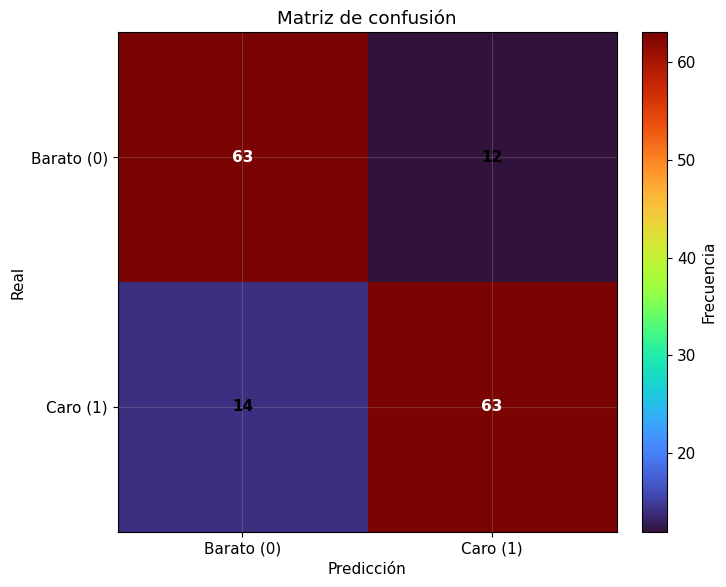

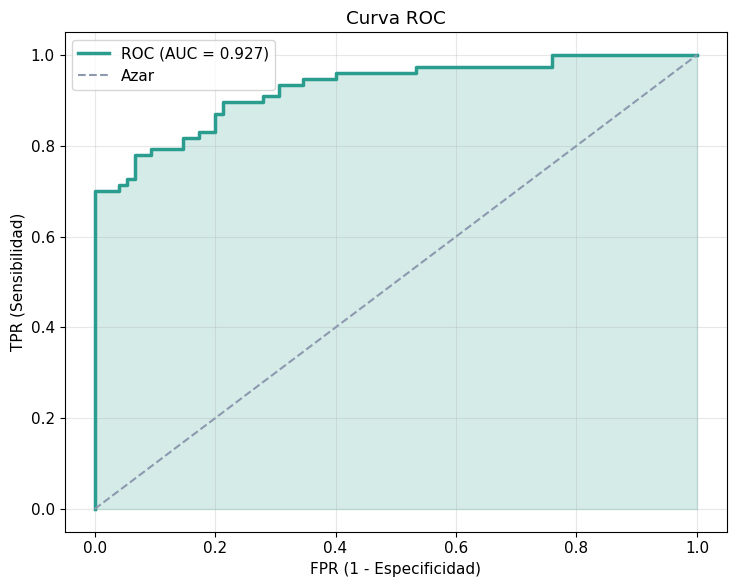

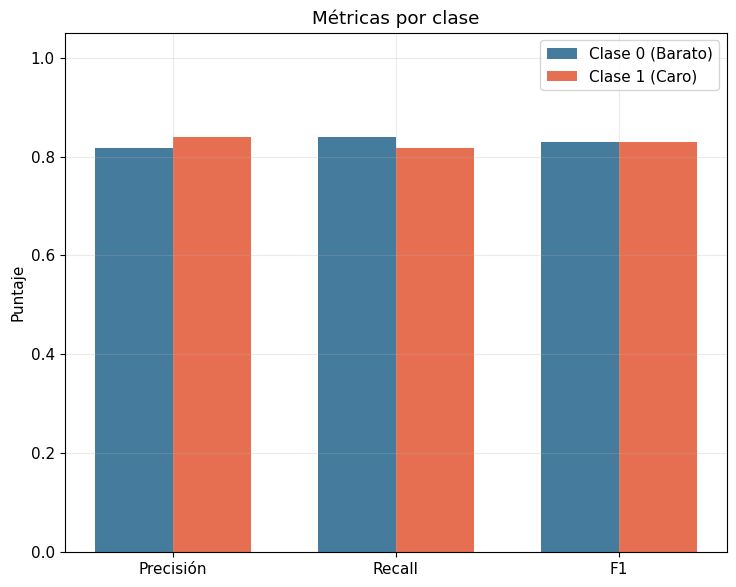

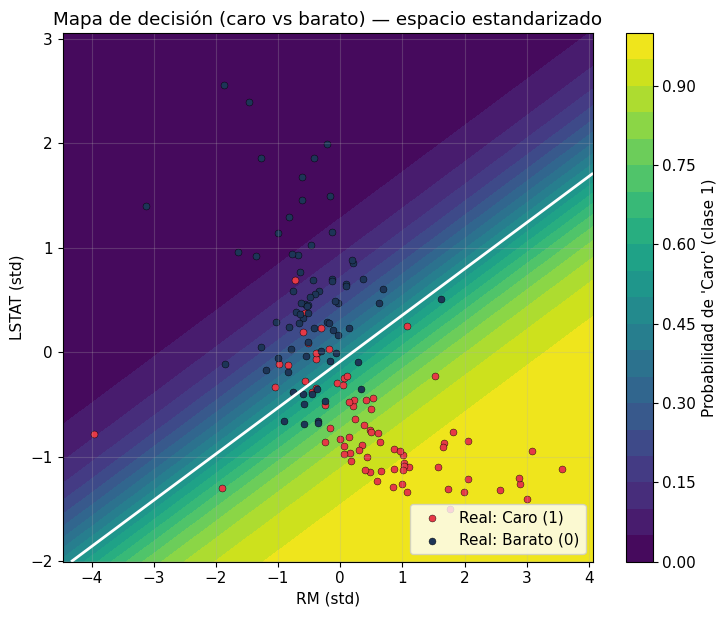

In [ ]:
# ================== IMPORTS ==================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve
)

plt.rcParams.update({
    "figure.figsize": (7.5, 6.0),
    "axes.grid": True,
    "grid.alpha": 0.25,
    "font.size": 11
})

# ================= CARGA DE DATOS =================
url = ("https://raw.githubusercontent.com/rasbt/"
       "python-machine-learning-book-3rd-edition/"
       "master/ch10/housing.data.txt")

df = pd.read_csv(url, header=None, sep=r"\s+")
df.columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS",
              "RAD","TAX","PTRATIO","B","LSTAT","MEDV"]

# ================= VARIABLE BINARIA =================
# 1 = caro, 0 = barato (umbral: mediana)
threshold = df["MEDV"].median()
df["EXPENSIVE"] = (df["MEDV"] >= threshold).astype(int)

# ================= FEATURES =================
X = df[["RM","LSTAT"]].values
y = df["EXPENSIVE"].values

# Partición train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Escalado
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std  = sc.transform(X_test)

# ================= MODELO LOGÍSTICO =================
log_reg = LogisticRegression()
log_reg.fit(X_train_std, y_train)

# Predicciones
y_pred = log_reg.predict(X_test_std)
y_prob = log_reg.predict_proba(X_test_std)[:, 1]

# ================== MÉTRICAS TEXTUALES ==================
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte clasificación:\n", classification_report(y_test, y_pred, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# =============== 1) MATRIZ DE CONFUSIÓN (HEATMAP) ===============
cm = confusion_matrix(y_test, y_pred)
classes = ["Barato (0)", "Caro (1)"]

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(cm, cmap="turbo")  # colormap llamativo
ax.set_title("Matriz de confusión")
ax.set_xlabel("Predicción")
ax.set_ylabel("Real")
ax.set_xticks(np.arange(len(classes))); ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes); ax.set_yticklabels(classes)

# Anotaciones en celdas
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = "white" if cm[i, j] > thresh else "black"
        ax.text(j, i, cm[i, j], ha="center", va="center", color=color, fontweight="bold")

# Barra de color
cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label("Frecuencia")
plt.tight_layout()
plt.show()

# ================= 2) CURVA ROC (AUC SOMBREADA) =================
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, linewidth=2.5, label=f"ROC (AUC = {auc:.3f})", color="#2a9d8f")
plt.fill_between(fpr, tpr, alpha=0.2, color="#2a9d8f")
plt.plot([0,1],[0,1], "--", color="#8d99ae", label="Azar")
plt.title("Curva ROC")
plt.xlabel("FPR (1 - Especificidad)")
plt.ylabel("TPR (Sensibilidad)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ======== 3) BARRAS: PRECISIÓN / RECALL / F1 POR CLASE =========
rep = classification_report(y_test, y_pred, output_dict=True)
metrics = ["precision", "recall", "f1-score"]
vals_0 = [rep["0"][m] for m in metrics]
vals_1 = [rep["1"][m] for m in metrics]

x = np.arange(len(metrics))
w = 0.35

plt.figure()
plt.bar(x - w/2, vals_0, width=w, label="Clase 0 (Barato)", color="#457b9d")
plt.bar(x + w/2, vals_1, width=w, label="Clase 1 (Caro)", color="#e76f51")
plt.xticks(x, ["Precisión", "Recall", "F1"])
plt.ylim(0, 1.05)
plt.ylabel("Puntaje")
plt.title("Métricas por clase")
plt.legend()
plt.tight_layout()
plt.show()

# ======= BONUS) MAPA DE DECISIÓN EN EL PLANO (RM vs LSTAT) =======
# (visual útil, no es métrica)
# Rejilla en espacio estandarizado
rm_std_min, rm_std_max = X_test_std[:,0].min()-0.5, X_test_std[:,0].max()+0.5
ls_std_min, ls_std_max = X_test_std[:,1].min()-0.5, X_test_std[:,1].max()+0.5
xx, yy = np.meshgrid(
    np.linspace(rm_std_min, rm_std_max, 300),
    np.linspace(ls_std_min, ls_std_max, 300)
)
proba_grid = log_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)

plt.figure(figsize=(7.5, 6.3))
cs = plt.contourf(xx, yy, proba_grid, levels=20, cmap="viridis")  # prob(Clase=1)
cbar = plt.colorbar(cs); cbar.set_label("Probabilidad de 'Caro' (clase 1)")
# Puntos de test (colores por etiqueta real)
mask1 = y_test==1
plt.scatter(X_test_std[mask1,0], X_test_std[mask1,1], s=25, c="#e63946", label="Real: Caro (1)", edgecolor="k", linewidth=0.3)
plt.scatter(X_test_std[~mask1,0], X_test_std[~mask1,1], s=25, c="#1d3557", label="Real: Barato (0)", edgecolor="k", linewidth=0.3)
# Frontera p=0.5
plt.contour(xx, yy, proba_grid, levels=[0.5], colors="white", linewidths=2)
plt.title("Mapa de decisión (caro vs barato) — espacio estandarizado")
plt.xlabel("RM (std)")
plt.ylabel("LSTAT (std)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
